## Quick Start Demo -- Diversity Analysis
### Load the required pacakges for this notebook ! 
None of this code needs to be changed. All places where changes are needed are indicated as Steps throughout this notebook.

# Step 1 : Change file path to input your data

In [1]:
%%capture
%matplotlib inline

import itertools
import os
import numpy as np
import pandas as pd
from scipy.spatial.distance import cosine, jaccard
import seaborn as sns
from pyclonal.io import combineFiles

from IPython.html.widgets import interact

try:
    import pyclonal
except ImportError:
    pyclonal_path = os.path.abspath(os.path.join('..'))
    if pyclonal_path not in sys.path:
        sys.path.append(pyclonal_path)
from pyclonal.utils import shannon_entropy,calc_clonality

# Step 1 : Change file path to input your data

In [2]:
#combine input files
directory = "../sample_input_files/"
pattern = "D*.changeo_small_demo.tsv"

df, seq_df = combineFiles(directory,pattern)

../sample_input_files/D287.changeo_small_demo.tsv looks like a changeo file
../sample_input_files/D233.changeo_small_demo.tsv looks like a changeo file
../sample_input_files/D280.changeo_small_demo.tsv looks like a changeo file
../sample_input_files/D255.changeo_small_demo.tsv looks like a changeo file
../sample_input_files/D299.changeo_small_demo.tsv looks like a changeo file


# Calculate Clonality

In [3]:
clonality=calc_clonality(df)

# Step 2 : Change file path to input your metadata that described your samples

In [4]:
metadata=pd.read_csv('../sample_input_files/metadata_demo.csv',index_col='filename')
metadata.head()

,patient_id,tissue_id,subset_1
filename,,,
D233_1,D233,Thymus,Naive
D233_2,D233,Spleen,Naive
D233_3,D233,BM,Naive
D233_4,D233,Bld,Naive
D233_5,D233,Thymus,Memory


In [5]:
merged_df=clonality.join(metadata)

In [6]:
plot_df=merged_df[merged_df['patient_id']=='D233']

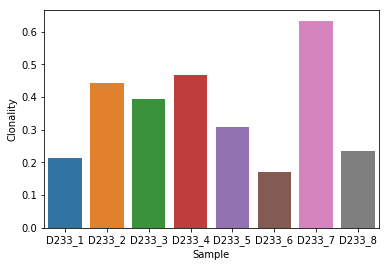

In [7]:
sns.barplot(x=plot_df.index,y=plot_df['Clonality'])